# ChatOllama

Ollama를 사용하면 Llama 2와 같은 오픈 소스 대규모 언어 모델을 로컬에서 실행할 수 있습니다. Ollama는 모델 가중치, 구성 및 데이터를 Modelfile로 정의된 단일 패키지로 번들링합니다. GPU 사용을 포함하여 설정 및 구성 세부 정보를 최적화합니다. 지원되는 모델 및 모델 변형의 전체 목록은 [Ollama model library](https://ollama.com/library)를 참조하세요.

## 설치

### 프로그램 설치
Ollama를 지원되는 플랫폼(Mac / Linux / Windows)에 다운로드하고 설치하세요.

- 설치주소: [https://ollama.com/](https://ollama.com/)

### 모델 다운로드

#### 허깅페이스

허깅페이스(HuggingFace) 에서 오픈모델을 다운로드 받습니다 (.gguf 확장자)

- GGUF: https://huggingface.co/teddylee777/EEVE-Korean-Instruct-10.8B-v1.0-gguf

#### Ollama 제공하는 모델

`ollama pull <name-of-model>` 명령을 사용하여 사용 가능한 LLM 모델을 가져오세요.
- 예: `ollama pull gemma:7b`

아래의 경로에 모델의 기본 태그 버전이 다운로드됩니다.

- Mac: `~/.ollama/models`
- Linux/WSL: `/usr/share/ollama/.ollama/models`

`ollama list`로 가져온 모든 모델을 확인하세요.

`ollama run <name-of-model>`로 명령줄에서 모델과 직접 채팅하세요.

### Modelfile 로부터 커스텀 모델 생성하기

모델을 임포트하기 위해 ModelFile을 먼저 생성해야 합니다. 자세한 정보는 [ModelFile 관련 공식 문서](https://github.com/ollama/ollama/blob/69f392c9b7ea7c5cc3d46c29774e37fdef51abd8/docs/modelfile.md)에서 확인할 수 있습니다.

> 샘플 모델파일 예시

```
FROM ggml-model-Q5_K_M.gguf

TEMPLATE """{{- if .System }}
<s>{{ .System }}</s>
{{- end }}
<s>Human:
{{ .Prompt }}</s>
<s>Assistant:
"""

SYSTEM """A chat between a curious user and an artificial intelligence assistant. The assistant gives helpful, detailed, and polite answers to the user's questions."""

PARAMETER stop <s>
PARAMETER stop </s>
```

### Chat 모델

Llama `chat` 모델(예: `ollama pull llama2:7b-chat`)을 사용하는 경우 `ChatOllama` 인터페이스를 사용할 수 있습니다. 여기에는 시스템 메시지 및 사용자 입력을 위한 special tokens이 포함됩니다.

### Ollama 모델 활용

- 모든 로컬 모델은 `localhost:11434`에서 제공됩니다.
- Command 창에서 직접 상호 작용하려면 `ollama run <name-of-model>`을 실행하세요.

In [1]:
import os

# LangSmith 추적을 설정합니다. https://smith.langchain.com
# !pip install langchain-teddynote
from langchain_teddynote import logging

# 프로젝트 이름을 입력합니다.
logging.langsmith("CH04-Models")

LangChain API Key가 설정되지 않았습니다. 참고: https://wikidocs.net/250954


In [2]:
# API KEY를 환경변수로 관리하기 위한 설정 파일
from dotenv import load_dotenv

# API KEY 정보로드
load_dotenv()

True

In [3]:
from langchain_community.chat_models import ChatOllama
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_teddynote.messages import stream_response

In [4]:
from langserve import RemoteRunnable

llm = RemoteRunnable(f"{os.getenv('LANGSERVE_ENDPOINT')}/llm")
# Ollama 모델을 불러옵니다.
# llm = ChatOllama(model="EEVE-Korean-10.8B:latest")

In [5]:
# 프롬프트
prompt = ChatPromptTemplate.from_template("{topic} 에 대하여 간략히 설명해 줘.")

# 체인 생성
chain = prompt | llm | StrOutputParser()

# 간결성을 위해 응답은 터미널에 출력됩니다.
answer = chain.stream({"topic": "deep learning"})

# 스트리밍 출력
stream_response(answer)

Deep learning은 머신 러닝의 한 부분으로,神经 nets를 기반으로 하는 기계 학습을 사용하는技术입니다.

 deep learning은 두 가지 주요한 특징이 있습니다:

1.  **데이타 수용과 가공**: Deep learning은 데이터가 자가 가공되거나 주변의 정보를 인식할 수 있게 만드는 신경망을 사용합니다.
2.  **어드버스리**: 어드버스리는 기계 학습에 데이터를 더 많은 방향으로 가시게 해주는 기술입니다.
 deep learning은 유용한 기술로 인용된 곳이 많습니다. 대표적인 예로는 자연 언어.processing, computer vision 및 강화학이 있습니다.

비동기 스트리밍(`astream()`) 지원을 위한 예시입니다. 위에서 생성한 단일 chain을 통해 모든 것이 가능합니다.


In [6]:
async for chunks in chain.astream(
    {"topic": "구글"}
):  # 비동기적으로 체인을 실행하여 청크 단위로 결과를 반환합니다.
    print(chunks, end="", flush=True)  # 각 청크를 출력합니다.

구글은 미국을 기반으로 하는 세계적인 검색 엔진 회사입니다. 설립된 것은 1998년이며, 구글은 사용자에게 가장 적합한 정보를 제공하는 것을 목표로 합니다.

구글의 주요 서비스에는 다음과 같습니다.

*   검색 엔진 (Google Search): 사용자가 검색할 때, 구글이.index해 lưu شده 자료를 기반으로 최적의 결과를 제공합니다.
*   이메일 서비스 (Gmail): 사용자가 이메일을 gửi고 수신할 수 있는service입니다.
*   cloud Storage (Google Drive): 사용자가 file와 dữ liệu를 가상적으로 저장하고 관리할 수 있는 service입니다.
*   소스 코드 리포지토리 (GitHub): 개발자들이 source code 및 프로젝트를 공유하고 관리하는 platform입니다.

구글은 또한 여러 다른 서비스를 제공합니다. 예를 들어, Google Maps는 사용자가 장소 정보를 검색하고 뷰를 볼 수 있는 service입니다. Google Photos는 사용자가 사진을 저장하고 Quản lý할 수 있는 service입니다.

구글의 특징 중 하나는, 구글은 사용자에게 가장 적합한 결과를 제공하는 것을 목표로 합니다. 구글은 사용자의 검색 behavior 및 preference를 분석하여, 사용자에게 가장 적합한 결과를 제공합니다.

## 출력형식: JSON

Ollama의 최신 버전을 사용하고 [`format`](https://github.com/jmorganca/ollama/blob/main/docs/api.md#json-mode) 플래그를 제공하세요.

`format` 플래그는 모델이 JSON 형식으로 응답을 생성하도록 강제합니다.

In [7]:
from langchain_community.chat_models import ChatOllama

llm = ChatOllama(
    model="gemma:7b",  # 사용할 언어 모델을 지정합니다.
    format="json",  # 입출력 형식을 JSON으로 설정합니다.
    temperature=0,
)

JSON 형식의 답변을 받기 위해서는 `"resonse in JSON format."` 이 프롬프트에 포함되어야 합니다.

In [8]:
# JSON 형식의 답변을 요구하는 프롬프트 작성
prompt = "유럽 여행지 10곳을 알려주세요. key: `places`. resonse in JSON format."

# 체인 호출
response = llm.invoke(prompt)
print(response.content)  # 생성된 응답을 출력합니다.

OllamaEndpointNotFoundError: Ollama call failed with status code 404. Maybe your model is not found and you should pull the model with `ollama pull gemma:7b`.

## 멀티모달(Multimodal) 지원

Ollama는 [bakllava](https://ollama.ai/library/bakllava)와 [llava](https://ollama.ai/library/llava)와 같은 멀티모달 LLM을 지원합니다.

`tags`를 사용하여 [Llava](https://ollama.ai/library/llava/tags)와 같은 모델의 전체 버전 세트를 탐색할 수 있습니다.

`ollama pull llava:7b` 혹은 `ollama pull bakllava` 명령어를 통해 멀티모달 LLM을 다운로드하세요.

**참고**
- 멀티모달을 지원하는 최신 버전을 사용하려면 Ollama를 업데이트해야 합니다.

PIL 이미지를 Base64 인코딩된 문자열로 변환하고 이를 HTML에 포함하여 이미지를 표시하는 함수를 제공합니다.

- `convert_to_base64` 함수:

  - PIL 이미지를 입력으로 받습니다.
  - 이미지를 JPEG 형식으로 BytesIO 버퍼에 저장합니다.
  - 버퍼의 값을 Base64로 인코딩하고 문자열로 반환합니다.

- `plt_img_base64` 함수:

  - Base64 인코딩된 문자열을 입력으로 받습니다.
  - Base64 문자열을 소스로 사용하는 HTML `<img>` 태그를 생성합니다.
  - HTML을 렌더링하여 이미지를 표시합니다.

- 사용 예시:
  - 지정된 파일 경로에서 PIL 이미지를 열어 `pil_image`에 저장합니다.
  - `convert_to_base64` 함수를 사용하여 `pil_image`를 Base64 인코딩된 문자열로 변환합니다.
  - `plt_img_base64` 함수를 사용하여 Base64 인코딩된 문자열을 이미지로 표시합니다.



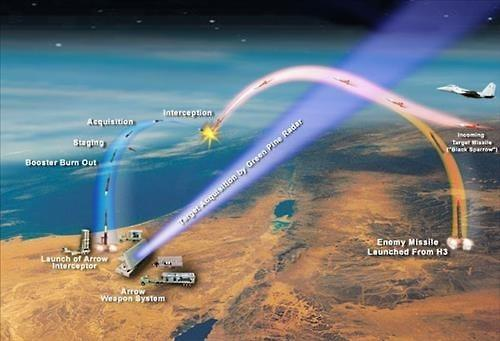

In [9]:
import base64
from io import BytesIO

from IPython.display import HTML, display
from PIL import Image
from langchain_core.messages import HumanMessage


def convert_to_base64(pil_image):
    """
    PIL 이미지를 Base64로 인코딩된 문자열로 변환합니다.

    :param pil_image: PIL 이미지
    :return: 크기 조정된 Base64 문자열
    """

    buffered = BytesIO()
    pil_image.save(buffered, format="JPEG")  # 필요한 경우 형식을 변경할 수 있습니다.
    img_str = base64.b64encode(buffered.getvalue()).decode("utf-8")
    return img_str


def plt_img_base64(img_base64):
    """
    Base64로 인코딩된 문자열을 이미지로 표시합니다.

    :param img_base64:  Base64 문자열
    """
    # Base64 문자열을 소스로 사용하여 HTML img 태그 생성
    image_html = f'<img src="data:image/jpeg;base64,{img_base64}" />'
    # HTML을 렌더링하여 이미지 표시
    display(HTML(image_html))


def prompt_func(data):  # 프롬프트 함수를 정의합니다.
    text = data["text"]  # 데이터에서 텍스트를 가져옵니다.
    image = data["image"]  # 데이터에서 이미지를 가져옵니다.

    image_part = {  # 이미지 부분을 정의합니다.
        "type": "image_url",  # 이미지 URL 타입을 지정합니다.
        "image_url": f"data:image/jpeg;base64,{image}",  # 이미지 URL을 생성합니다.
    }

    content_parts = []  # 콘텐츠 부분을 저장할 리스트를 초기화합니다.

    text_part = {"type": "text", "text": text}  # 텍스트 부분을 정의합니다.

    content_parts.append(image_part)  # 이미지 부분을 콘텐츠 부분에 추가합니다.
    content_parts.append(text_part)  # 텍스트 부분을 콘텐츠 부분에 추가합니다.

    return [HumanMessage(content=content_parts)]  # HumanMessage 객체를 반환합니다.


# file_path = "./images/jeju-beach.jpg"
file_path = "./images/war.jpg"
pil_image = Image.open(file_path)

image_b64 = convert_to_base64(pil_image)

plt_img_base64(image_b64)

- `ChatOllama` 언어 모델을 사용하여 이미지와 텍스트 기반 질의에 대한 답변을 생성하는 체인을 구현합니다.
- `prompt_func` 함수는 이미지와 텍스트 데이터를 입력으로 받아 `HumanMessage` 형식으로 변환합니다.
  - 이미지 데이터는 Base64 인코딩된 JPEG 형식으로 전달됩니다.
  - 텍스트 데이터는 일반 텍스트로 전달됩니다.
- `StrOutputParser`를 사용하여 언어 모델의 출력을 문자열로 파싱합니다.
- `prompt_func`, `llm`, `StrOutputParser`를 파이프라인으로 연결하여 `chain`을 생성합니다.
- `chain.invoke` 메서드를 호출하여 이미지와 텍스트 질의를 전달하고 답변을 생성합니다.
- 생성된 답변을 출력합니다.


In [10]:
from langchain_core.output_parsers import StrOutputParser
from langchain_community.chat_models import ChatOllama
from langchain_core.messages import HumanMessage

# ChatOllama 멀티모달 언어 모델을 불러옵니다.
# llm = ChatOllama(model="llava:7b", temperature=0)
llm = RemoteRunnable(f"{os.getenv('LANGSERVE_ENDPOINT')}/llm-llava")

# 프롬프트 함수, 언어 모델, 출력 파서를 연결하여 체인을 생성합니다.
chain = prompt_func | llm | StrOutputParser()

query_chain = chain.invoke(  # 체인을 호출하여 쿼리를 실행합니다.
    # 텍스트와 이미지를 전달합니다.
    {"text": "Describe a picture in bullet points", "image": image_b64}
)

print(query_chain)  # 쿼리 결과를 출력합니다.

 - The image is a humorous political cartoon.
- It features a stylized representation of Earth, with various elements superimposed on it.
- On the left side of the image, there are three depictions labeled "ALTERNATIVES" and pointing towards different areas:
  - One pointing to space, labeled "Space."
  - Another pointing to military intervention in a Middle Eastern country, labeled "Military Intervention."
  - The third pointing to an unidentified location with a missile labeled "Launch Missile."
- These three "solutions" are shown as alternative ways of dealing with the depicted situation.
- In the middle of the image is a large satellite dish, possibly representing surveillance or communication equipment.
- Around the satellite dish are various other elements:
  - Two beams of light labeled "Satellite," showing the signal paths.
  - A drone-like object with an eye, labeled "Drone," which could represent spy technology.
  - A missile launcher with a missile in flight, labeled "Missil